In [1]:
#load the necessary libraries and the dataset.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#define parameters for the new dataset with dependencies
n_samples = 1000

#generating random data with dependencies and additional columns
data = {
    'Age': np.random.randint(20, 80, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Healthy_Diet': np.random.choice([True, False], n_samples, p=[0.5, 0.5]),
    'BMI': np.random.uniform(18, 40, n_samples),
    'Glucose_Level': np.zeros(n_samples),
    'Blood_Pressure': np.zeros(n_samples),
    'Insulin_Level': np.zeros(n_samples),
    'Family_History': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
    'Physical_Activity': np.random.randint(0, 8, n_samples)
}

df = pd.DataFrame(data)


In [4]:
# Adjust glucose level, blood pressure, and insulin level based on BMI and physical activity
for i in range(n_samples):
    bmi = df.loc[i, 'BMI']
    activity = df.loc[i, 'Physical_Activity']
    
    # Define glucose level as higher for higher BMI and lower for more physical activity
    df.loc[i, 'Glucose_Level'] = np.clip((100 + (bmi - 25) * 3 - activity * 5), 70, 200)
    
    # Define blood pressure as higher for higher BMI and lower for more physical activity
    df.loc[i, 'Blood_Pressure'] = np.clip((90 + (bmi - 25) * 2 - activity * 4), 90, 180)
# Define insulin level inversely with physical activity and directly with BMI
    df.loc[i, 'Insulin_Level'] = np.clip((50 + (bmi - 25) * 4 - activity * 15), 0, 300)

# Define pre-diabetes based on glucose level, BMI, family history, and healthy diet
df['Pre_diabetes'] = ((df['Glucose_Level'] > 126) | (df['BMI'] > 30) |
                      (df['Family_History'] == 1) & (~df['Healthy_Diet'])).astype(int)


In [5]:
df.head()


,Age,Gender,Healthy_Diet,BMI,Glucose_Level,Blood_Pressure,Insulin_Level,Family_History,Physical_Activity,Pre_diabetes
0,27,Male,True,24.838043,89.514130,90.000000,19.352173,0,2,0
1,52,Female,True,20.673538,72.020615,90.000000,0.000000,0,3,0
2,37,Male,True,35.520817,116.562450,99.041633,47.083266,0,3,1
3,28,Female,False,36.975716,100.927148,90.000000,0.000000,0,7,1
4,76,Female,True,33.068162,109.204486,94.136324,37.272648,1,3,1


In [8]:
df.to_csv('output.csv', index=False)

In [9]:
# Load the data (assuming the dataframe is named df)
df = pd.read_csv('output.csv')  

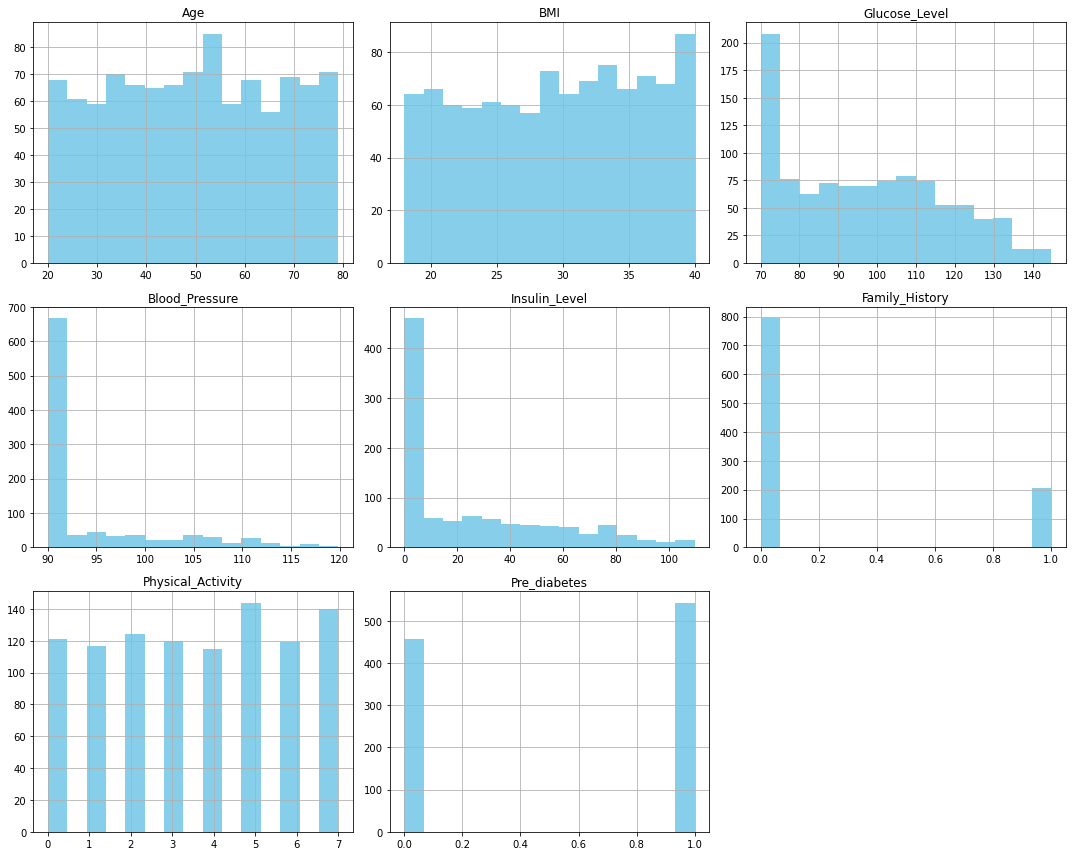

In [11]:
df.hist(figsize=(15, 12), bins=15,color='skyblue')
plt.tight_layout()
plt.show()

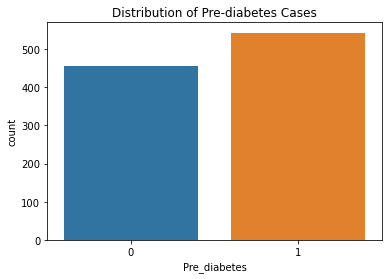

In [12]:
# Checking the balance of the target variable
sns.countplot(x='Pre_diabetes', data=df)
plt.title('Distribution of Pre-diabetes Cases')
plt.show()


In [13]:
# Data Preprocessing Before applying Random Forest, we need to handle categorical variables and split the data into training and testing sets.

# Convert categorical variables to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Healthy_Diet'] = df['Healthy_Diet'].astype(int)

# Splitting the dataset into training and testing sets
X = df.drop('Pre_diabetes', axis=1)
y = df['Pre_diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Model Building: Random Forest We will use the Random Forest classifier to predict pre-diabetes.
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

In [35]:
# Model Evaluation Let's evaluate the model using accuracy and other metrics.

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


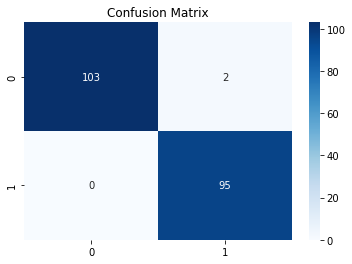

In [37]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.98      1.00      0.99        95

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



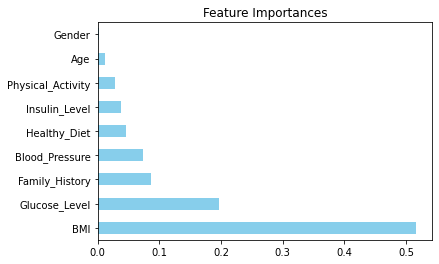

In [21]:
# Feature Importance Understanding which features are most important in predicting pre-diabetes.
# Plotting feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh',  color='skyblue')
plt.title('Feature Importances')
plt.show()